In [1]:
# example of importing a module 
# here, we want the method factorial
# from the library called math
from math import factorial

# perform an inefficient prime number test
# 
# Wilson's theorum 
# http://mathworld.wolfram.com/WilsonsTheorem.html
# states that p is a prime number 
# iff (p-1)! == -1, mod p

# test number
p = 7919

# calculate the factorial
p1_fact = factorial(p-1)

# do the comparison in modulo p
is_prime = (p1_fact % p == -1 % p)

if is_prime:
    print p,"is a prime number"
else:
    print p,"is not a prime number"

7919 is a prime number


As an example of data masking, consider the QA mask in the [MODIS Leaf Area Index (LAI)](https://lpdaac.usgs.gov/products/modis_products_table/leaf_area_index_fraction_of_photosynthetically_active_radiation/8_day_l4_global_1km/mod15a2) product:


<table>
<tr>
<td>Bit number</td>
<td>Parameter Name</td>
<td>Bit combination</td>
<td>Interpretation</td>
</tr><tr>

<td>0</td>
<td>MODLAND_QC bits</td>
<td>0</td>
<td>Good quality (main algorithm with or without saturation)</td>
</tr><tr>

<td></td>
<td></td>
<td>1</td>
<td>Other Quality (back-up algorithm or fill values)</td>
</tr><tr>

<td>1</td>
<td>Sensor</td>
<td>0</td>
<td>Terra</td>
</tr><tr>

<td></td>
<td></td>
<td>1</td>
<td>Aqua</td>
</tr><tr>

<td>2</td>
<td>DeadDetector</td>
<td>0</td>
<td>Detectors apparently fine for up to 50% of channels</td>
</tr><tr>

<td></td>
<td></td>
<td>1</td>
<td>Dead detectors caused >50% adjacent detector retrieval</td>
</tr><tr>

<td>3-4</td>
<td>CloudState</td>
<td>00</td>
<td>Significant clouds NOT present (clear)</td>
</tr><tr>

<td></td>
<td></td>
<td>01</td>
<td>Significant clouds WERE present</td>
</tr><tr>

<td></td>
<td></td>
<td>10</td>
<td>Mixed cloud present on pixel</td>
</tr><tr>

<td></td>
<td></td>
<td>11</td>
<td>Cloud state not defined (assumed clear)</td>
</tr><tr>

<td>5-7</td>
<td>CF_QC</td>
<td>000</td>
<td>Main (RT) method used (best result possible (no saturation))</td>
</tr><tr>

<td></td>
<td></td>
<td>001</td>
<td>Main (RT) method used with saturation. (usable)</td>
</tr><tr>

<td></td>
<td></td>
<td>010</td>
<td>Main (RT) method failed due to bad geometry (empirical algorithm used)</td>
</tr><tr>

<td></td>
<td></td>
<td>010</td>
<td>Main (RT) method failed due to problems other than geometry (empirical algorithm used)</td>
</tr><tr>

<td></td>
<td></td>
<td>010</td>
<td>Pixel not produced at all.</td>
</tr>
</table>


So, the MODIS LAI QA information is contained in one byte (8 bits), which encodes data about five different categories of QA information.

When using such data, we need to make choices about what quality of data we are willing to accept.

For the moment, you can ignore this piece of code below. We will learn of such things later, but here we read in some data into a variable `qa`, and diaplay those data:

<matplotlib.colorbar.Colorbar instance at 0x106b92320>

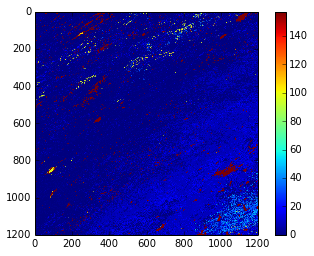

In [1]:
# jump ahead a bit in the course
# to read some data in from a npz file
# and show it
import numpy as np
f = np.load('data/MCD15A2.A2011185.h09v05.005.npz')
lai = f['lai']
lai_sd = f['lai_sd']
qa = f['qc']
plt.imshow(qa)
plt.colorbar()

We now want to be able to interpret those qa codes:

From the table above, we want to access the `MODLAND_QC bits` which are in the first bit of this:

We can simply access this applying a bitwise and operation with bit mask of value 1 (to pull the information on the first bit). This then will have values of zero or one. We can convert these to `bool`,so now zero values are `False`.

The table above tells us that we want values of zero here, so we take a ones complement so that `mask` is `True` where we want the data.

<matplotlib.colorbar.Colorbar instance at 0x11401d8c0>

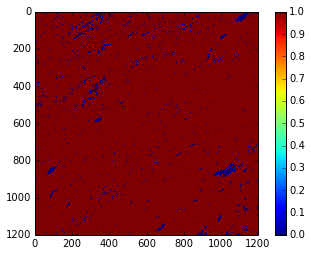

In [4]:
mask = ~((qa & 0b1).astype(bool))
plt.imshow(mask,interpolation='nearest')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x115143d40>

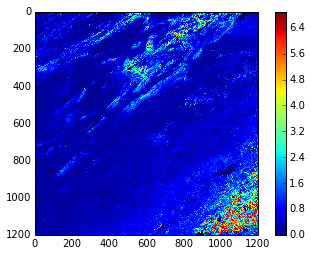

In [5]:
mask = ~((qa & 0b1).astype(bool))
plt.imshow(lai*mask,interpolation='nearest')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1151cfef0>

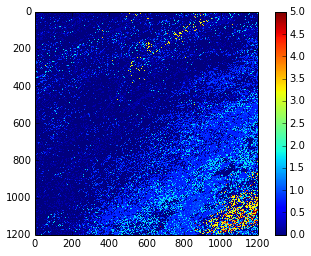

In [6]:
mask = ~((qa & 0b1).astype(bool))
plt.imshow(lai_sd*mask,interpolation='nearest')
plt.colorbar()